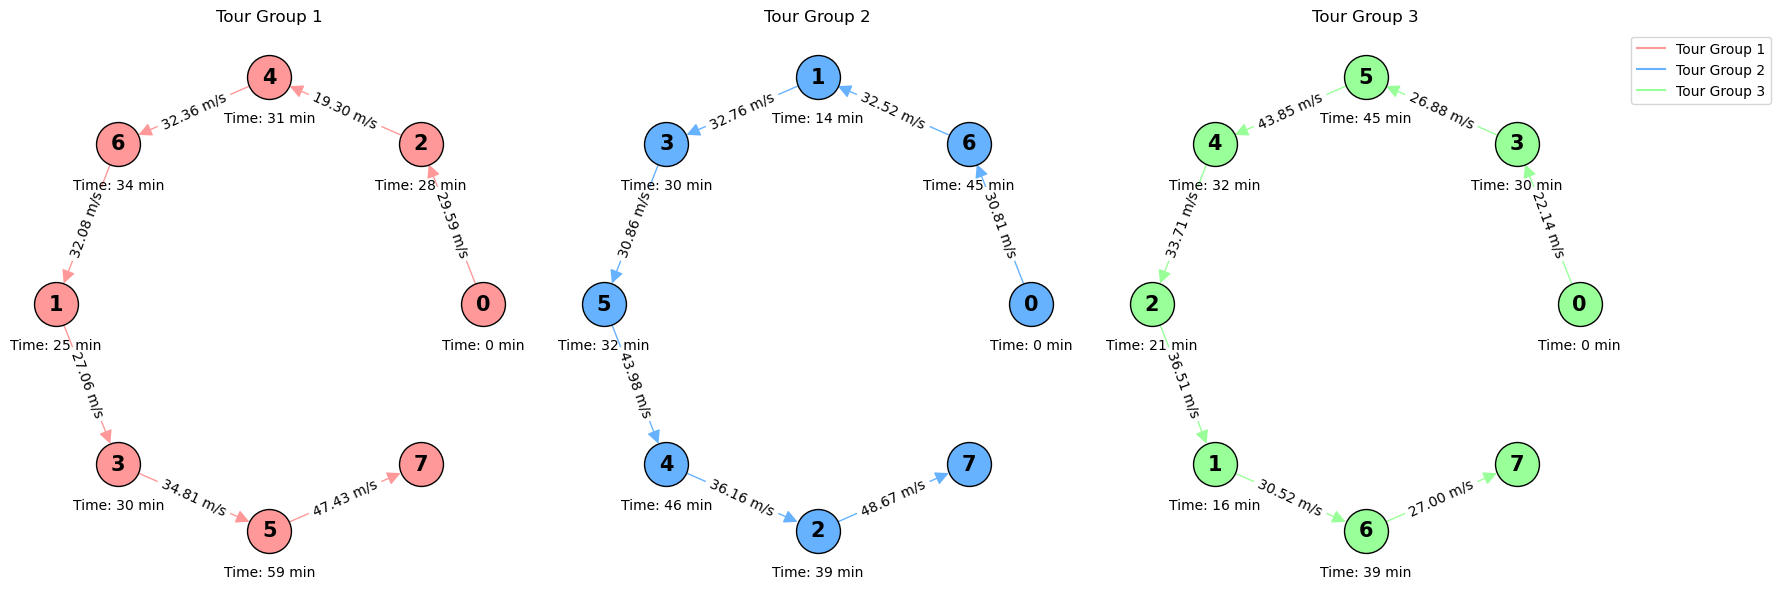

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Given data
solutions = [[[2, 28, 29.593478705323065],
  [4, 31, 19.298840748734932],
  [6, 34, 32.36478385905514],
  [1, 25, 32.07656980885399],
  [3, 30, 27.05777478332037],
  [5, 59, 34.80901511521414],
  [7, float("inf"), 47.433120508114726]],
 [[6, 45, 30.806320165353085],
  [1, 14, 32.52312652420581],
  [3, 30, 32.76224475877537],
  [5, 32, 30.8570916053979],
  [4, 46, 43.982272383474246],
  [2, 39, 36.15963481241758],
  [7, float("inf"), 48.66865945700388]],
 [[3, 30, 22.136006111972737],
  [5, 45, 26.87927210605011],
  [4, 32, 43.848278698600495],
  [2, 21, 33.7107307359625],
  [1, 16, 36.509070150072176],
  [6, 39, 30.517482869078574],
  [7, float("inf"), 26.995979366691486]]]


colors = ['#FF9999', '#66B2FF', '#99FF99']  # Different colors for different tour groups

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for idx, (group, ax, color) in enumerate(zip(solutions, axes, colors)):
    G = nx.DiGraph()
    
    group = [[0, 0, 0]] + group  # Adding the starting point
    
    edges = [(group[i][0], group[i + 1][0], group[i + 1][2]) for i in range(len(group) - 1)]
    edge_labels = {(edge[0], edge[1]): f"{edge[2]:.2f} m/s" for edge in edges}
    
    G.add_edges_from([(edge[0], edge[1]) for edge in edges])

    pos = nx.circular_layout(G)
    nx.draw(G, pos, ax=ax, with_labels=False, node_size=1000, node_color=color, edgecolors='black', font_size=15, edge_color=color, arrowsize=20)

    for node, time, speed in group:
        label_pos = (pos[node][0], pos[node][1] - 0.2)  # Adjust position for time label
        if time != float('inf'):
            ax.text(label_pos[0], label_pos[1], f'Time: {time} min', horizontalalignment='center')
        ax.text(pos[node][0], pos[node][1], str(node), horizontalalignment='center', verticalalignment='center', fontsize=15, weight='bold', color='k')
    
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels)
        
    ax.set_title(f'Tour Group {idx + 1}')
    ax.axis('off')

# Adding legend manually for clarity
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, label=f'Tour Group {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig(r"E:\Desktop\周子煜的数模之路\第四次论文\tour_groups.png", format='png', bbox_inches='tight')
plt.show()
# 保存为SVG格式

# 或保存为PDF格式
# plt.savefig(r"E:\Desktop\周子煜的数模之路\第四次论文\tour_groups.pdf", format='pdf', bbox_inches='tight')




C:\Users\86158\AppData\Local\Temp\ipykernel_20536\2019899161.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


ValueError: x and y must have same first dimension, but have shapes (84,) and (200,)

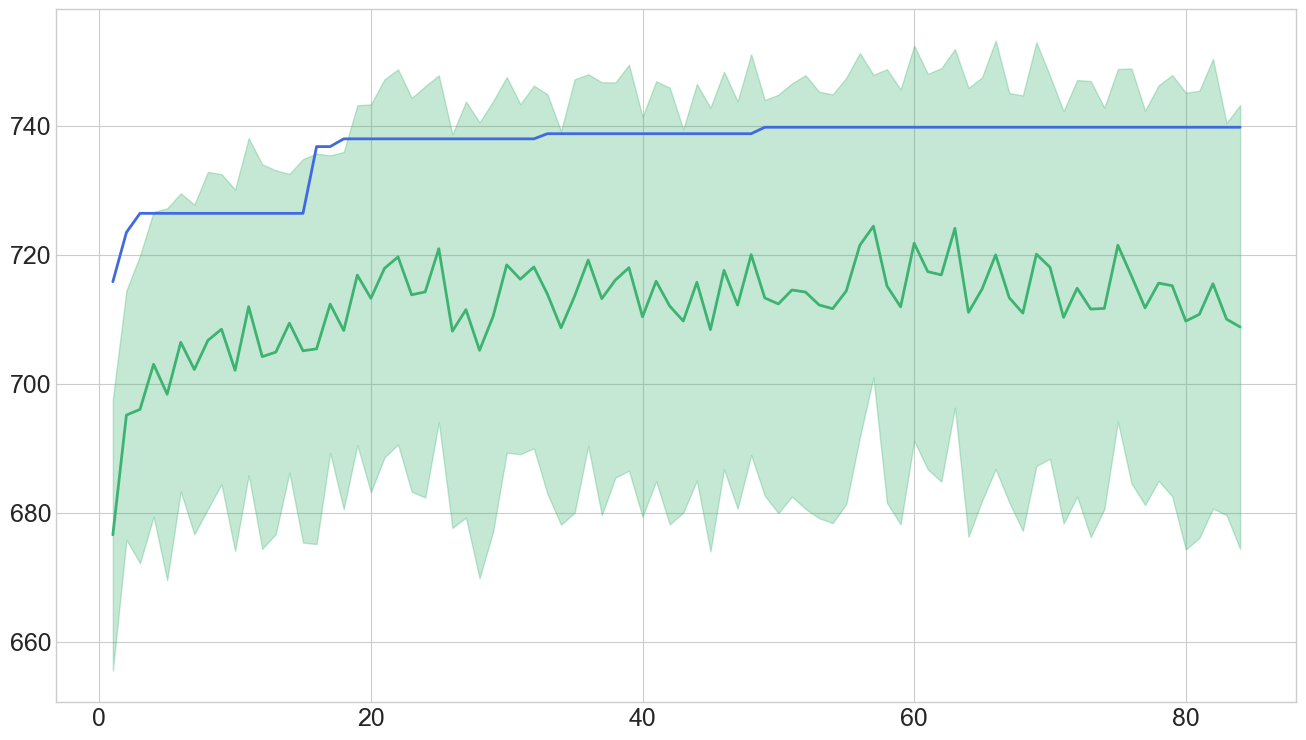

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# Load the first dataset
data1 = pd.read_pickle("E:\Desktop\周子煜的数模之路\第四次论文\scores_data.pkl")

# Load the second dataset
data2 = pd.read_pickle("E:\Desktop\周子煜的数模之路\第四次论文\scores_data2.pkl")


# Determine the minimum length between the two datasets
min_length = min(len(data1["best_scores"]), len(data2["best_scores"]))

# Trim the data to the minimum length
iterations = list(range(1, min_length + 1))
best_scores1 = data1["best_scores"][:min_length]
average_scores1 = data1["average_scores"][:min_length]
std_dev_scores1 = data1["std_dev_scores"][:min_length]

best_scores2 = data2["best_scores"][:min_length]
average_scores2 = data2["average_scores"][:min_length]
std_dev_scores2 = data2["std_dev_scores"][:min_length]

# Define a more professional style for the plot
plt.style.use('seaborn-whitegrid')

# Plotting the comparison with enhanced styles
plt.figure(figsize=(16, 9))

# Define line widths
line_width = 2
fill_alpha = 0.3



# Plotting data from the first dataset
plt.plot(iterations, best_scores1, label="Best Scores (Baseline Algorithm)", color="royalblue", linestyle='-', linewidth=line_width)
plt.plot(iterations, average_scores1, label="Average Scores (Baseline Algorithm)", color="mediumseagreen", linestyle='-', linewidth=line_width)
plt.fill_between(iterations,
                 [avg - std for avg, std in zip(average_scores1, std_dev_scores1)],
                 [avg + std for avg, std in zip(average_scores1, std_dev_scores1)],
                 color="mediumseagreen", alpha=fill_alpha)

# Plotting data from the second dataset
plt.plot(iterations, best_scores2, label="Best Scores (AGA + SA)", color="firebrick", linestyle='--', linewidth=line_width)
plt.plot(iterations, average_scores2, label="Average Scores (AGA + SA)", color="darkorange", linestyle='--', linewidth=line_width)
plt.fill_between(iterations,
                 [avg - std for avg, std in zip(average_scores2, std_dev_scores2)],
                 [avg + std for avg, std in zip(average_scores2, std_dev_scores2)],
                 color="darkorange", alpha=fill_alpha)

# Enhancing title, labels and legend
plt.xlabel("Iterations", fontsize=16)
plt.ylabel("Scores", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14, frameon=True)
plt.savefig(r"E:\Desktop\周子煜的数模之路\第四次论文\比较.svg", format='svg', bbox_inches='tight')
# Show the enhanced plot
plt.tight_layout()
plt.show()




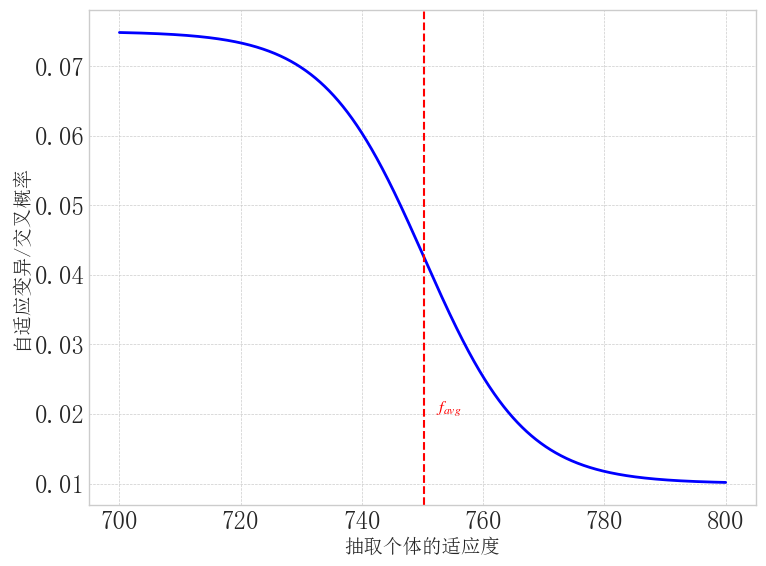

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
def factor_probability4(f_, fmean, fmax, Pmin=0.01, Pmax=0.075, A=3):
    return (Pmax - Pmin) / (1 + np.exp(A * 2 * (f_ - fmean) / (fmax - fmean))) + Pmin

config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


# 生成固定的数据f和固定的fmean值
f = np.random.uniform(700, 800, 10000)
fmean = np.mean(f)
fmax = max(f)
f = np.sort(f)
outputs = [factor_probability4(f_, fmean, fmax) for f_ in f]

plt.figure(figsize=(8,6), dpi=100)  # 设置图像大小和分辨率
plt.plot(f, outputs, '-', color='blue', linewidth=2)  # 使用连续的线并设置线的颜色和线宽
plt.axvline(x=fmean, color='r', linestyle='--', linewidth=1.5)  # 绘制fmean的竖线

# 在指定位置绘制带有下标的文本
plt.text(fmean + 2, min(outputs) + 0.01, r'$f_{avg}$', fontsize=12, color='r')

plt.xlabel("抽取个体的适应度", fontsize=14)  
plt.ylabel("自适应变异/交叉概率", fontsize=14)
plt.tight_layout()  # 确保所有的元素都在图像范围内
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(r"E:\Desktop\周子煜的数模之路\第四次论文\自适应.png", format='png', bbox_inches='tight',dpi=1000)
plt.show()








In [16]:
for i in range(0,10):
    best_scores1[i] = best_scores2[i]

In [11]:
len(best_scores2)

200

In [14]:
best_scores3 =best_scores2